In [1]:
#import snscrape.modules.twitter as sntwitter
from sklearn.ensemble import VotingClassifier
from scipy.sparse import csr_matrix
import nltk
nltk.download('punkt')
nltk.download('swadesh')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.corpus import stopwords,swadesh
#from deep_translator import GoogleTranslator
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import PIL.Image
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier
#from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jajar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package swadesh to
[nltk_data]     C:\Users\jajar\AppData\Roaming\nltk_data...
[nltk_data]   Package swadesh is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jajar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\jajar\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


**LECTURA DEL DATASET REVIEWS Y LIMPIEZA**

In [2]:
data= pd.read_csv("olist_order_reviews_dataset.csv")
data=data[["review_comment_message","review_score"]]
data.head(3)
data.isna().sum()

review_comment_message    58247
review_score                  0
dtype: int64

In [3]:
data.dropna(inplace=True)

In [4]:
data.shape

(40977, 2)

In [5]:
def sentiment(polar):
    if polar <3:
        return("Negative")
    elif polar ==3:
        return("Neutral")
    else:
        return("Positive")

In [6]:
data["Sentiment"]= data["review_score"].apply(sentiment)

In [7]:
data.head()

,review_comment_message,review_score,Sentiment
3,Recebi bem antes do prazo estipulado.,5,Positive
4,Parabéns lojas lannister adorei comprar pela I...,5,Positive
9,aparelho eficiente. no site a marca do aparelh...,4,Positive
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,Positive
15,"Vendedor confiável, produto ok e entrega antes...",5,Positive


Funciones a utilizar

In [8]:
stop_words = set(stopwords.words('portuguese'))
def processing_text(text):
    text=text.lower()
    #re.sub(cadena a buscar, con la que se reemplaza, cadena leida)
    url= ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    menciones='@[\w\-]+'
    hashtag='#[\w\-]+'
    caracteres_especiales=r'\W'
    caracter_individual=r'\s+[a-zA-Z]\s+'
    caracter_individual_inicio=r'\^[a-zA-Z]\s+'
    varios_espacios = r'\s+'
    numeros='[0-9]+'
    prefijo_b=r'^b\s+'
    text=re.sub(url,' ',text)
    text=re.sub(menciones,' ',text)
    text=re.sub(hashtag,' ',text)
    text=re.sub(caracteres_especiales,' ',text)
    text=re.sub(caracter_individual_inicio,' ',text)
    text=re.sub(caracter_individual,' ',text)
    text=re.sub(varios_espacios,' ',text)
    text=re.sub(numeros,' ',text)
    text=re.sub(prefijo_b,' ',text)
    
    
    #translator = GoogleTranslator(source="auto", target="pt")
    #text = translator.translate(text)

    text_tokens=word_tokenize(text)
    
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

def processing_text2(text):
    text=text.lower()
    #re.sub(cadena a buscar, con la que se reemplaza, cadena leida)
    url= ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    menciones='@[\w\-]+'
    hashtag='#[\w\-]+'
    caracteres_especiales=r'\W'
    caracter_individual=r'\s+[a-zA-Z]\s+'
    caracter_individual_inicio=r'\^[a-zA-Z]\s+'
    varios_espacios = r'\s+'
    numeros='[0-9]+'
    prefijo_b=r'^b\s+'
    text=re.sub(url,' ',text)
    text=re.sub(menciones,' ',text)
    text=re.sub(hashtag,' ',text)
    text=re.sub(caracteres_especiales,' ',text)
    text=re.sub(caracter_individual_inicio,' ',text)
    text=re.sub(caracter_individual,' ',text)
    text=re.sub(varios_espacios,' ',text)
    text=re.sub(numeros,' ',text)
    text=re.sub(prefijo_b,' ',text)
    
    
    translator = GoogleTranslator(source="auto", target="pt")
    text = translator.translate(text)

    text_tokens=word_tokenize(text)
    
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
   
def sentiment(polar):
    if polar <0:
        return("Negative")
    elif polar ==0:
        return("Neutral")
    else:
        return("Positive")
    

Se efectua limpieza de los comentarios

In [9]:
data["review_comment_message"]=data["review_comment_message"].apply(processing_text)


In [10]:
stemmer= PorterStemmer()
def steaming(text):
    text= stemmer.stem(text)
    return text

data["review_comment_message"]=data["review_comment_message"].apply(lambda x : steaming(x))

In [11]:
data

,review_comment_message,review_score,Sentiment
3,recebi bem antes prazo estipulado,5,Positive
4,parabéns lojas lannister adorei comprar intern...,5,Positive
9,aparelho eficiente site marca aparelho impress...,4,Positive
12,pouco travando valor ta boa,4,Positive
15,vendedor confiável produto ok entrega antes prazo,5,Positive
...,...,...,...
99205,produto recebi acordo compra realizada,4,Positive
99208,entregou dentro prazo produto chegou condições...,5,Positive
99215,produto enviado nf existe venda nf certeza fic...,3,Neutral
99221,excelente mochila entrega super rápida super r...,5,Positive


Haciendo numerico y a escala de 0,1,2 el Sentimiento

In [12]:
sentiment=data[["review_comment_message", "Sentiment"]]
sentiment["feeling"]=9

for i,j in enumerate(sentiment["Sentiment"]):
    if j=="Positive":
        sentiment["feeling"].iloc[i]=2
    elif j=="Neutral":
        sentiment["feeling"].iloc[i]=1
    else:
        sentiment["feeling"].iloc[i]=0



In [13]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40977 entries, 3 to 99223
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
 1   Sentiment               40977 non-null  object
 2   feeling                 40977 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [14]:
sentiment.drop(["Sentiment"],axis=1, inplace=True)

In [15]:
sentiment.to_csv("sentiment.csv", index=False)

In [16]:
sentiment.head()

,review_comment_message,feeling
3,recebi bem antes prazo estipulado,2
4,parabéns lojas lannister adorei comprar intern...,2
9,aparelho eficiente site marca aparelho impress...,2
12,pouco travando valor ta boa,2
15,vendedor confiável produto ok entrega antes prazo,2


**GRAFICOS DE LA BASE DE DATOS DE COMENTARIOS DE OLIST**

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

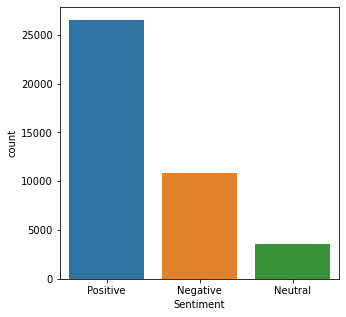

In [17]:
fig= plt.figure(figsize=(5,5))
sns.countplot(x="Sentiment", data=data)

Text(0.5, 1.0, 'Distribution of Sentiments for Olist in Tweeter')

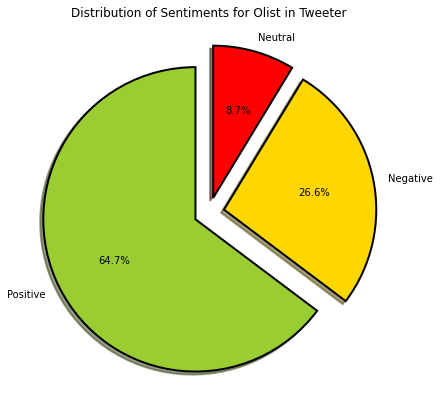

In [18]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags= data["Sentiment"].value_counts()
explode = (0.1,0.1,0.1)
plt.pie(x=tags,explode=explode,colors=colors,labels=tags.index,
        autopct='%1.1f%%',shadow=True,startangle=90,wedgeprops= wp)
plt.title("Distribution of Sentiments for Olist in Tweeter")

Ahora veamos los 100 comentarios de maximo puntaje para cada sentimiento

In [19]:
positive_= data[data["Sentiment"]=="Positive"]
positive_= positive_.sort_values(["review_score"],ascending=False)
positive_.head(100)

,review_comment_message,review_score,Sentiment
3,recebi bem antes prazo estipulado,5,Positive
61991,gostei entregue antes prazo,5,Positive
61967,produto otima qualidad,5,Positive
61966,chegou antes prazo,5,Positive
61953,gostei parabéns compromisso consumidor,5,Positive
...,...,...,...
62434,bom,5,Positive
62430,veio td perfeito estado antes previsto,5,Positive
62429,chegou tudo direitinho antes prazo,5,Positive
62425,produto chegou dentro prazo,5,Positive


Text(0.5, 1.0, 'Most frequent words in Positive Comments')

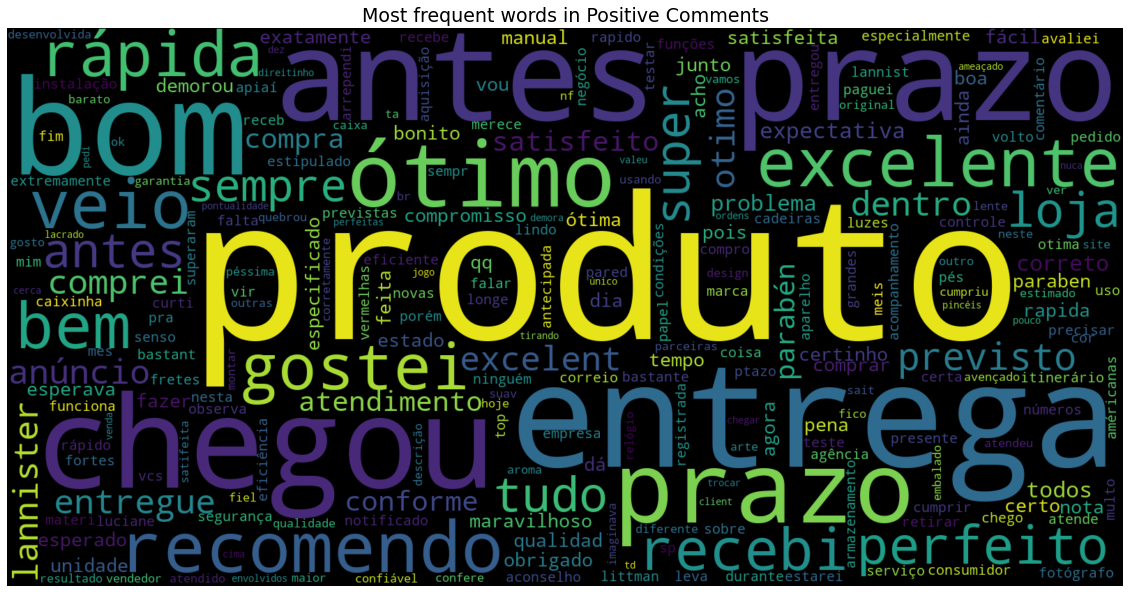

In [20]:
text_pos= " ".join ([word for word in positive_["review_comment_message"].head(100)])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud= WordCloud(max_words=500,width=1600,height=800).generate(text_pos)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in Positive Comments", fontsize=19)

In [21]:
negative_= data[data["Sentiment"]=="Negative"]
negative_= negative_.sort_values(["review_score"],ascending=True)
negative_.head(100)

,review_comment_message,review_score,Sentiment
49535,sei motivo dificuldade entrega pais aposentado...,1,Negative
62227,queria saber aconteceu entrega pois desde dia ...,1,Negative
62233,produto nao foto qualidade pessima mal acabado...,1,Negative
62248,vermelho reais ainda fiquei confirmado bege re...,1,Negative
62255,comprei colcha veio lençol elástico propaganda...,1,Negative
...,...,...,...
61180,comprei dois cartuchos impressora pedido pague...,1,Negative
61196,produto nunca chegou unidade cidad,1,Negative
61230,comprei duas unidades recebi apenas valor duas...,1,Negative
61233,produtos assento carro mantas chegaram datas d...,1,Negative


Text(0.5, 1.0, 'Most frequent words in Negative Comments')

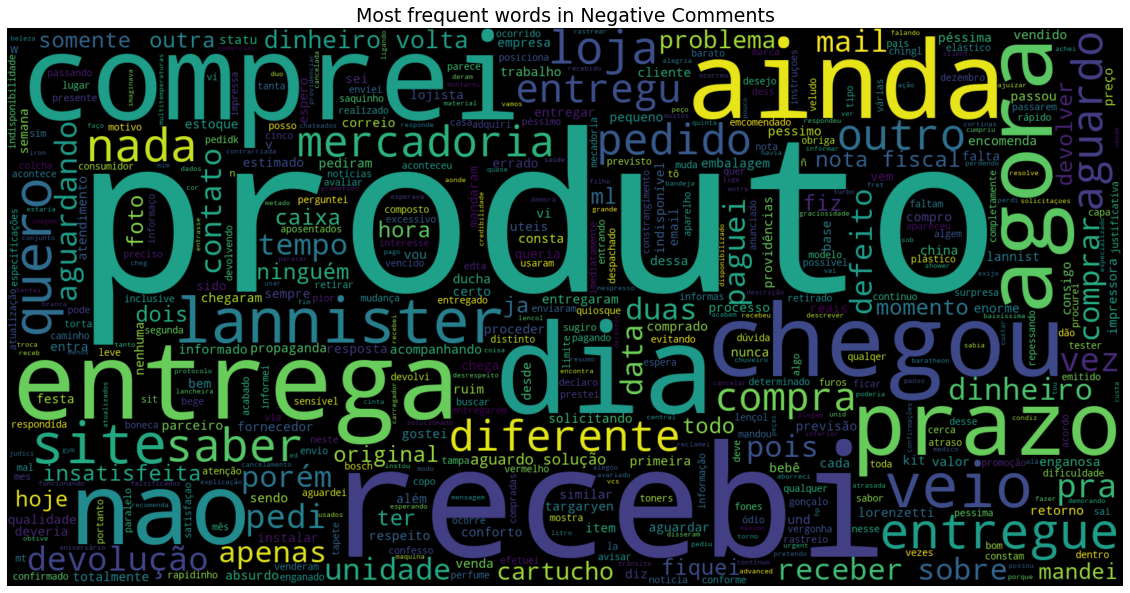

In [22]:
text_neg= " ".join ([word for word in negative_["review_comment_message"].head(100)])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud= WordCloud(max_words=500,width=1600,height=800).generate(text_neg)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in Negative Comments", fontsize=19)

**BALANCE DE CLASES**

In [23]:
X = sentiment["review_comment_message"]
Y = sentiment["feeling"]

In [24]:
sentiment["feeling"].value_counts()

2    26530
0    10890
1     3557
Name: feeling, dtype: int64

La clase neutral es poca pero no nos intersará balancearla, se prefiere en tal caso que el modelo decida entre positivo y negativo si fuera el caso. Dierente hubiera sido si la clase "Negative" hibiera sido la deficiente.

**DIVISION DE LA DATA Y VECTORIZACION**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print("Size of x_train : ",x_train.shape)
print("Size of y_train : ",y_train.shape)
print("Size of x_test : ",x_test.shape)
print("Size of y_test : ",y_test.shape)

Size of x_train :  (28683,)
Size of y_train :  (28683,)
Size of x_test :  (12294,)
Size of y_test :  (12294,)


In [26]:
vect=CountVectorizer(ngram_range=(1,1)).fit(x_train)
x_train = vect.transform(x_train)

**REGRESION LOGISTICA MULTINOMIAL SIN GRILLA**

In [27]:

log= LogisticRegression(multi_class="multinomial")
log.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [28]:
x_test=vect.transform(x_test)
y_pred_log= log.predict(x_test)
log_acc= accuracy_score(y_pred_log,y_test)
print("Test Accuracy {:.2f}%".format(log_acc*100))

Test Accuracy 82.93%


Text(0.5, 1.0, 'Distribution of Sentiments for Olist Reviews')

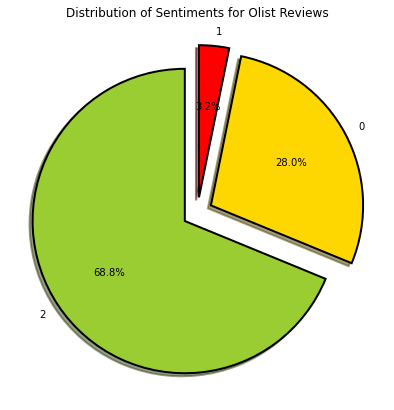

In [30]:
df1=pd.DataFrame(data=y_pred_log,columns=["Sentimiento_log"])

fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags= df1["Sentimiento_log"].value_counts()
explode = (0.1,0.1,0.1)
plt.pie(x=tags,explode=explode,colors=colors,labels=tags.index,
        autopct='%1.1f%%',shadow=True,startangle=90,wedgeprops= wp)
plt.title("Distribution of Sentiments for Olist Reviews")

In [27]:
joblib.dump(log,"log.joblib")
joblib.dump(vect,"vect.joblib")

['vect.joblib']

In [33]:
print(confusion_matrix(y_test,y_pred_log))
print("\n")
print(classification_report(y_test,y_pred_log))

[[2652  150  445]
 [ 410  106  576]
 [ 382  136 7437]]


              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3247
           1       0.27      0.10      0.14      1092
           2       0.88      0.93      0.91      7955

    accuracy                           0.83     12294
   macro avg       0.64      0.62      0.61     12294
weighted avg       0.80      0.83      0.81     12294



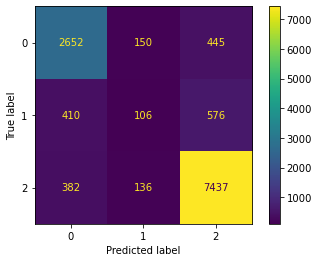

In [34]:
style.use="classic"
cm=confusion_matrix(y_test,y_pred_log,labels=log.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()


**REGRESION LOGISTICA MULTINOMIAL CON GRILLA**

In [35]:
param_grid = {"C":[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [36]:
print("Best Parameters",grid.best_params_)

Best Parameters {'C': 0.1}


In [37]:
y_pred_grid= grid.predict(x_test)

In [38]:
grid_log_acc= accuracy_score(y_pred_grid,y_test)
print("Test Accuracy {:.2f}%".format(grid_log_acc*100))

Test Accuracy 83.22%


In [39]:
print(confusion_matrix(y_test,y_pred_grid))
print("\n")
print(classification_report(y_test,y_pred_grid))

[[2660   45  542]
 [ 423   47  622]
 [ 384   47 7524]]


              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3247
           1       0.34      0.04      0.08      1092
           2       0.87      0.95      0.90      7955

    accuracy                           0.83     12294
   macro avg       0.66      0.60      0.59     12294
weighted avg       0.79      0.83      0.80     12294



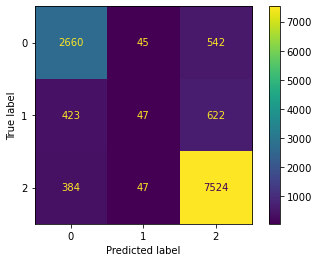

In [40]:
style.use="classic"
cm=confusion_matrix(y_test,y_pred_grid,labels=log.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

Text(0.5, 1.0, 'Distribution of Sentiments for Olist Reviews - Grid')

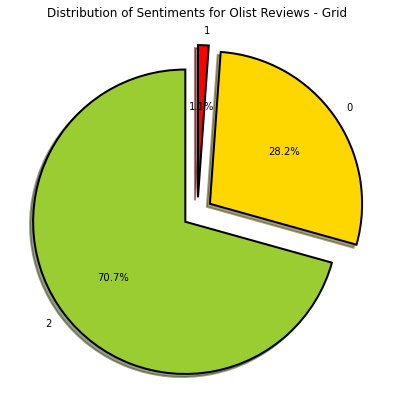

In [41]:
df2=pd.DataFrame(data=y_pred_grid,columns=["Sentimiento_log"])

fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={"linewidth":2,"edgecolor":"black"}
tags= df2["Sentimiento_log"].value_counts()
explode = (0.1,0.1,0.1)
plt.pie(x=tags,explode=explode,colors=colors,labels=tags.index,
        autopct='%1.1f%%',shadow=True,startangle=90,wedgeprops= wp)
plt.title("Distribution of Sentiments for Olist Reviews - Grid")

**MAQUINA DE SOPORTE VECTORIAL**

In [31]:
svm = LinearSVC()
svm.fit(x_train,y_train)

svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred,y_test)
print("Test Accuracy {:.2f}%".format(svm_acc*100))

Test Accuracy 81.89%


In [37]:
joblib.dump(svm,"svm.joblib")

['svm.joblib']

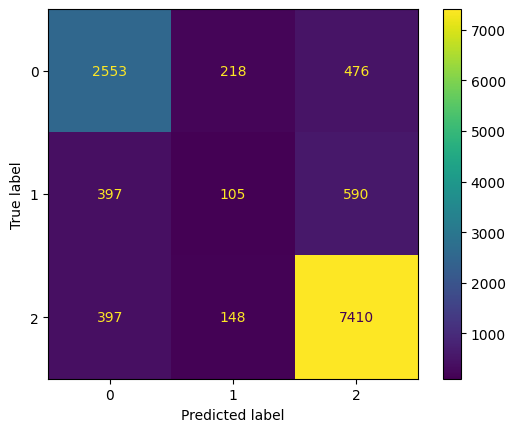

In [38]:
style.use="classic"
cm=confusion_matrix(y_test,svm_pred,labels=svm.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

11.- **RANDOM FOREST CON GRILLA**

In [32]:


# Number of trees in random forest
n_estimators = [500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "bootstrap": bootstrap}

In [33]:
RF = RandomForestClassifier()

RF_mod = GridSearchCV(RF, param_grid=param_grid, cv=3)
RF_mod.fit(x_train,y_train)
joblib.dump(RF_mod,"RF.joblib")
ypred_rf = RF_mod.predict(x_test)

In [ ]:
rf_acc = accuracy_score(ypred_rf,y_test)
print("Test Accuracy {:.2f}%".format(rf_acc*100))

11.- **NAIVE BAYES**

In [61]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
joblib.dump(MNB,"MNB.joblib")
ypred_mnb = MNB.predict(x_test)

In [62]:
mnb_acc = accuracy_score(ypred_mnb,y_test)
print("Test Accuracy {:.2f}%".format(mnb_acc*100))

Test Accuracy 82.77%


11.- **RANDOM FOREST SIN GRILLA**

In [49]:
RF_mod = RandomForestClassifier(n_estimators=1000, max_depth=20,min_samples_leaf=5)
RF_mod.fit(x_train,y_train)
ypred_rf = RF_mod.predict(x_test)

In [51]:
rf_acc = accuracy_score(ypred_rf,y_test)
print("Test Accuracy {:.2f}%".format(rf_acc*100))
joblib.dump(RF_mod,"RF.joblib")

Test Accuracy 69.96%


['RF.joblib']

**ENSAMBLE HARD VOTING**

In [66]:
from sklearn.ensemble import VotingClassifier

ensamble = VotingClassifier(estimators=[("rf", RF_mod),
                                               ("mnb", MNB),
                                               ("svm",svm),
                                               ("log",log)],
                                   voting='hard')

In [67]:
ensamble.fit(x_train, y_train)
y_pred_e = ensamble.predict(x_test)

In [68]:
ensamble_acc = accuracy_score(y_pred_e,y_test)
print("Test Accuracy {:.2f}%".format(ensamble_acc*100))
joblib.dump(ensamble,"ensamble.joblib")

Test Accuracy 83.08%


['ensamble.joblib']